<a href="https://colab.research.google.com/github/Tabonnu/other/blob/main/math/%E8%87%AA%E4%BD%9C/math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#相加平均 (Σを使った式)

##普通に実装

In [1]:
x = [170,170,176,176,183] #smapの身長

In [2]:
n = len(x)
avg = 0
for i in range(n):
  avg += x[i]

print("相加平均:"+str(avg/n))

相加平均:175.0


##numpy を使ったやり方

In [3]:
import numpy as np

np.array(x).mean()

175.0

#標準偏差

$$σ^{2} = \frac{1}{n}\sum_1^n(x_{i}-μ)^{2}$$

・与えられたデータがどのくらいの範囲に散らばっているのかを知る指標  
・一般的な分布の場合、与えられたデータの9割は標準偏差の約２倍に収まる

In [4]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas　#データ解析

from matplotlib import pylab as plt  # Matplotlib



In [5]:
baseball = pd.read_csv('https://raw.githubusercontent.com/massongit/math-program-book/master/9_data/%E3%83%97%E3%83%AD%E9%87%8E%E7%90%83/%E3%83%97%E3%83%AD%E9%87%8E%E7%90%83%E9%81%B8%E6%89%8B%E8%BA%AB%E9%95%B7%E4%BD%93%E9%87%8D.csv')
baseball['BMI'] = baseball['体重'] / ((baseball['身長']/100)**2)
baseball.head(3) #頭から３つを表示

,チーム,背番号,氏名,生年月日,身長,体重,投,打,BMI
0,広島,11,福井 優也,1988.02.08,178,85,右,右,26.827421
1,広島,12,九里 亜蓮,1991.09.01,187,92,右,右,26.309017
2,広島,13,加藤 拓也,1994.12.31,176,88,右,右,28.409091


##普通に実装

In [6]:
def std(x):
  """
  標準偏差を求める
  param x:標本
  return 標準偏差
  """

  mu = np.mean(x)
  sigma = 0 #標準偏差
  n = len(x)

  #平均と要素の差を取って２乗する
  for i in range(n):
    sigma += (x[i]-mu)**2

  sigma /= n

  return np.sqrt(sigma) 


In [7]:
baseball_std = std(baseball['BMI'])
pd.DataFrame({'標準偏差':[baseball_std]},index=['野球'])

,標準偏差
野球,2.177626


##numpyを使ったやり方

In [8]:
baseball_std = np.std(baseball['BMI'])
pd.DataFrame({'標準偏差':[baseball_std]},index=['野球'])

,標準偏差
野球,2.177626


##pandasを使ったやり方

In [9]:
baseball_std = baseball['BMI'].std(ddof = 0) #ddof=1の時は、/nのnがn-1になる　#不偏分散を求める場合は1
pd.DataFrame({'標準偏差':[baseball_std]},index=['野球'])

,標準偏差
野球,2.177626


##具体例
データが正規分布に従っている場合、そのデータは相加平均を起点として、標準偏差の前後1.96倍の範囲に95%の要素が収まると言われています。
今、野球選手のBMIが正規分布に近いことが分かっています。
このことを確かめよ。

In [13]:
mu = np.mean(baseball['BMI'])
std = np.std(baseball['BMI'])
x = len(baseball) #表の行数(野球選手の人数)
y = len(baseball[(baseball['BMI']<mu+std*1.96)&(baseball['BMI']>mu-std*1.96)])#条件に収まる人数
print('{0:.3f}%'.format(y/x*100))

95.012%


###不偏分散

In [19]:
x = np.random.choice(baseball['BMI'],n)
pd.DataFrame({'標準偏差':[x.std(ddof=0)],'不偏分散':[x.std(ddof=1)]},index=['野球'])

,標準偏差,不偏分散
野球,1.347556,1.506614


###グラフで表示

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29699 missing from current font.
  font.set_

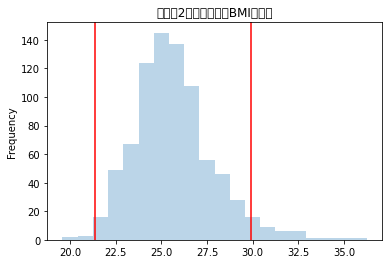

In [16]:
ax = baseball['BMI'].plot(kind='hist',title='グラフ2：野球選手のBMIの分布',bins=20,alpha=0.3) #alpha:グラフの透過度
ax.axvline(mu+std*1.96,color = 'red')
ax.axvline(mu-std*1.96,color = 'red')

#極限

極限を実装するときはfor分を使いほどよく極限を目指して頑張る